# 1.Đọc dữ liệu cần thiết

## 1.1.Đọc dữ liệu file pickle

In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
# Import data from pickle
with open('car_cleaned.pkl','rb') as f:
    main=pickle.load(f)

# 2.Thống kê mô tả và chia tập dữ liệu kiểm thử

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## 2.1.Thống kê mô tả dữ liệu

In [4]:
print(main.shape)
main.head(3)

(38337, 12)


,url,post_date,Price,carbrand,carmodel,mfdate,mileage_v2,condition_ad,gearbox,fuel,carorigin,web
1,https://xe.chotot.com/mua-ban-oto-quan-tan-phu...,2024-04-02,979000000,Ford,Ranger,2024,0,Mới,Tự động,Xăng,Lắp ráp trong nước,chotot
2,https://xe.chotot.com/mua-ban-oto-quan-tan-phu...,2024-04-02,950000000,Ford,Everest,2019,38000,Đã sử dụng,Tự động,Dầu,Nhập khẩu,chotot
3,https://xe.chotot.com/mua-ban-oto-quan-tan-phu...,2024-04-02,1099000000,Ford,Everest,2024,0,Mới,Tự động,Dầu,Nhập khẩu,chotot


In [5]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38337 entries, 1 to 49621
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   url           38337 non-null  object        
 1   post_date     38337 non-null  datetime64[ns]
 2   Price         38337 non-null  int64         
 3   carbrand      38337 non-null  object        
 4   carmodel      38337 non-null  object        
 5   mfdate        38337 non-null  int32         
 6   mileage_v2    38337 non-null  int32         
 7   condition_ad  38337 non-null  object        
 8   gearbox       38337 non-null  object        
 9   fuel          38337 non-null  object        
 10  carorigin     38337 non-null  object        
 11  web           38337 non-null  object        
dtypes: datetime64[ns](1), int32(2), int64(1), object(8)
memory usage: 3.5+ MB


In [6]:
# Chuyển Price về dạng triệu VND
main["Price"] = main["Price"]/1000000

## 2.2. Visualize các biến

In [7]:
# Xác định các biến X và y
X_cate = ["carbrand","carmodel","condition_ad","gearbox","fuel","carorigin"]
X_cont = ["mfdate","mileage_v2"]

y = "Price"

### 2.2.1.Visualize biến y

<Axes: ylabel='Price'>

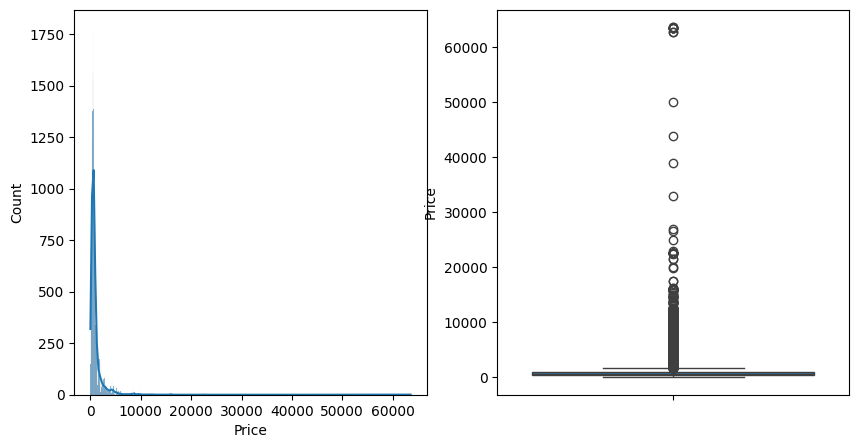

In [8]:
# Visualize biến y
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(data=main, x=y, kde=True, ax=axs[0])
sns.boxplot(data=main, y=y, ax=axs[1])

<Axes: ylabel='Price'>

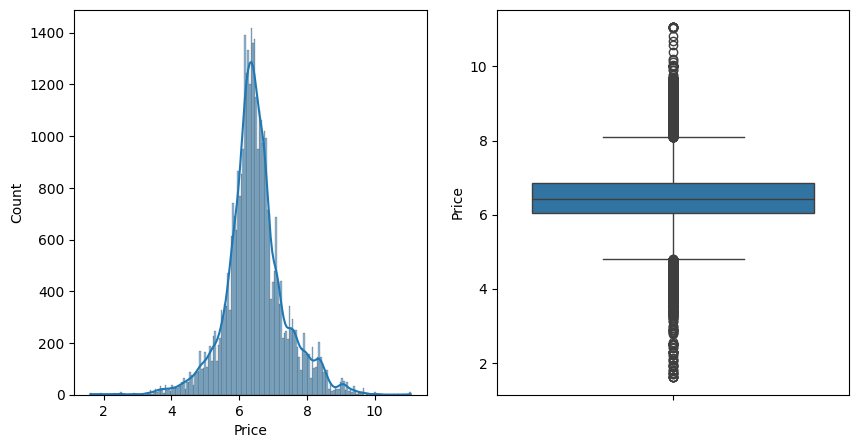

In [9]:
# Biến đổi theo hàm log và kiểm tra lại
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(data=main, x=np.log(main[y]), kde=True, ax=axs[0])
sns.boxplot(data=main, y=np.log(main[y]), ax=axs[1])

In [10]:
print(main[y].describe())
# Phân vị 1%, 5%, 95%, 99% lần lượt là:
np.percentile(main[y], [1,5,95,99])

count    38337.000000
mean      1022.891729
std       1797.290002
min          5.000000
25%        419.000000
50%        615.000000
75%        954.000000
max      63568.000000
Name: Price, dtype: float64


array([  59. ,  160.8, 3300. , 8100. ])

### 2.2.2.Visualize biến X rời rạc

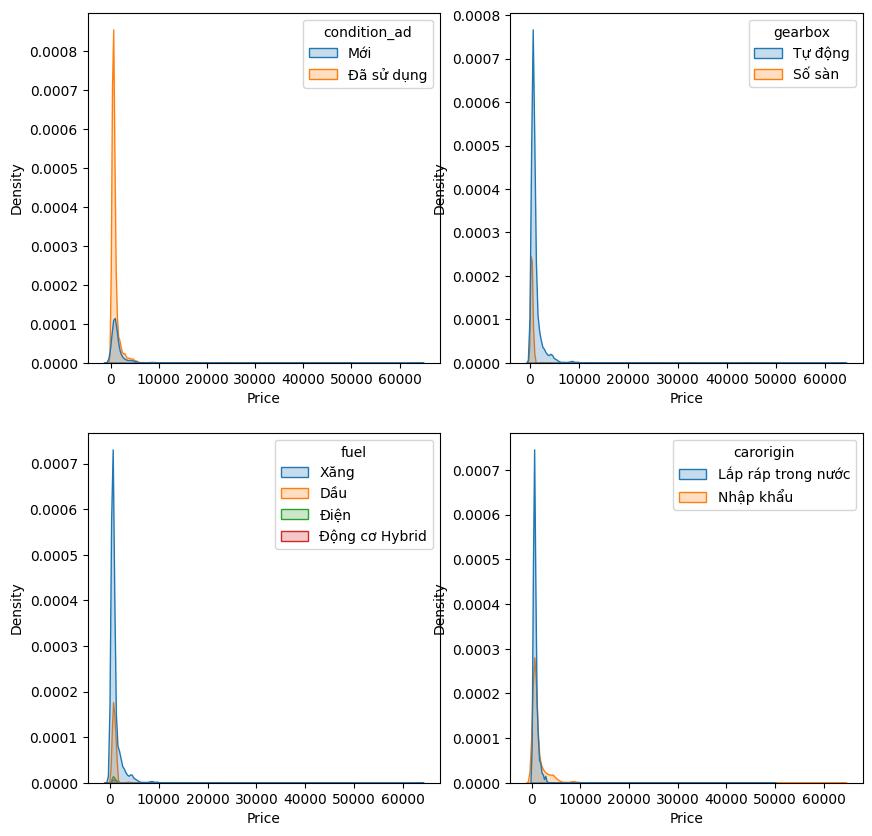

In [11]:
# Visualize biến categorical bằng box plot
# Không visualize carbrand và carmodel vì chắc chắn phụ thuộc và nhiều giá trị
X_cate_visualize = X_cate[2:]

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
for i in range(len(X_cate_visualize)):
    sns.kdeplot(data=main, x=y, hue=X_cate_visualize[i],fill= True, ax=axs[i//2,i%2])

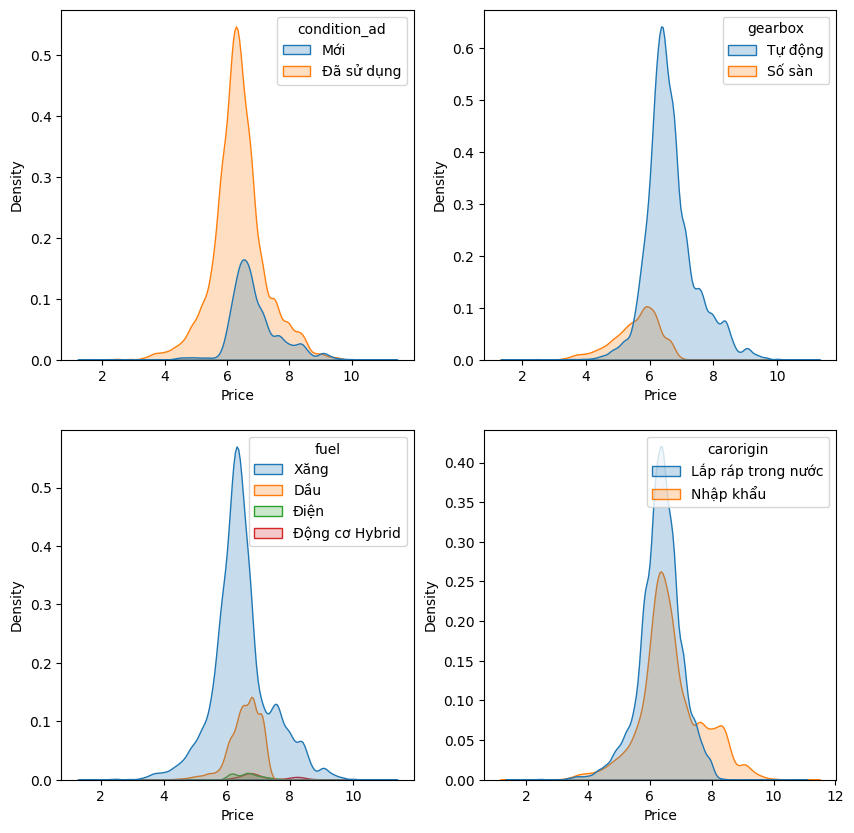

In [12]:
# Sử dụng biến y là biến đã biến đổi theo hàm log
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
for i in range(len(X_cate_visualize)):
    sns.kdeplot(data=main, x=np.log(main[y]), fill=True, hue=X_cate_visualize[i], ax=axs[i//2,i%2])

### 2.2.3.Visualize biến X liên tục

In [13]:
main[X_cont].describe()

,mfdate,mileage_v2
count,38337.000000,3.833700e+04
mean,2018.659207,7.270325e+04
std,5.350625,1.446565e+06
min,1980.000000,0.000000e+00
25%,2017.000000,3.000000e+03
50%,2020.000000,3.600000e+04
75%,2022.000000,7.200000e+04
max,2024.000000,1.800000e+08


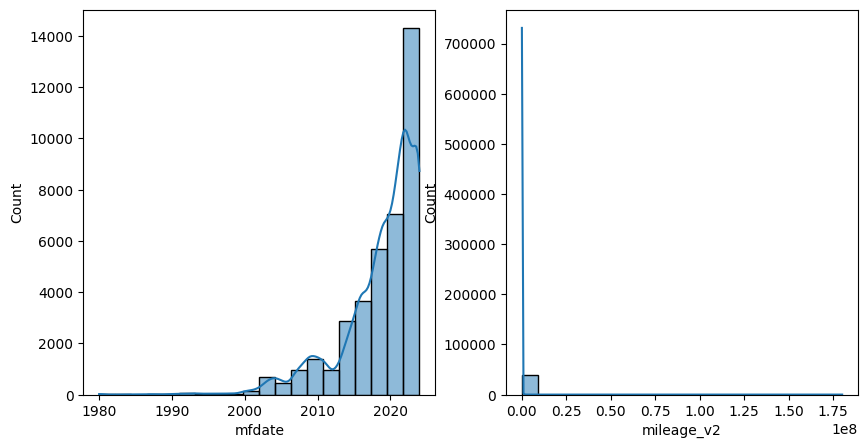

In [14]:
# 1. Visualize histogram của biến liên tục
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
for i in range(len(X_cont)):
    sns.histplot(data=main, x=X_cont[i], bins=20, kde=True, ax=axs[i%2])

<Axes: xlabel='mileage_v2', ylabel='Count'>

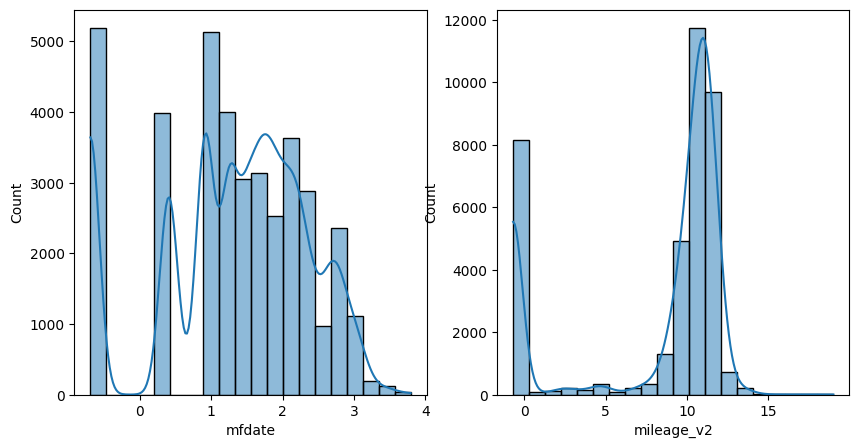

In [15]:
from datetime import datetime
# 2.Nhiều biến X dạng khá chuẩn, một số lệch phải => có thể xem xét biến đổi thêm hàm log để đưa đồ thị về đối xứng hơn
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,5))

sns.histplot(x=np.log(datetime.now().year - main[X_cont[0]]+0.5), bins=20, kde=True, ax=axs[0])
sns.histplot(x=np.log(main[X_cont[1]]+0.5), bins=20, kde=True, ax=axs[1])

<Axes: >

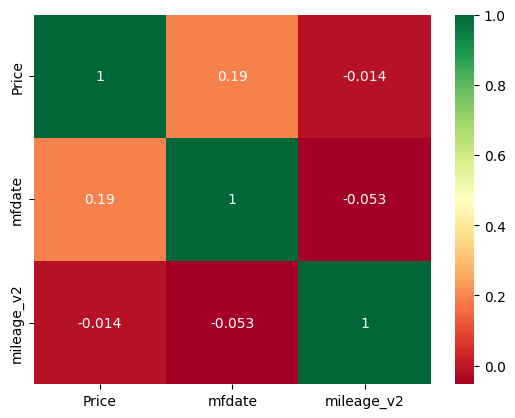

In [16]:
# 3. Vẽ ma trận tương quan giữa biến y và các biến X liên tục
sns.heatmap(main[[y]+X_cont].corr(), annot=True, cmap="RdYlGn", annot_kws={"size": 10})

# 3.Tiền xử lý dữ liệu

In [64]:
from sklearn import pipeline, preprocessing, compose, base

## 3.1.Chia tập dữ liệu train/test (tỷ lệ 80/20)

In [18]:
from sklearn.model_selection import train_test_split

# Chia tập dữ liệu, stratified theo cate_orange
X_train, X_test, y_train, y_test = train_test_split(main[X_cate+X_cont], main[y], test_size=0.2, random_state=42, stratify=main[["carbrand","carmodel"]])

## 3.2.Tạo thêm biến mới

In [19]:
class FeatureAddition(base.BaseEstimator, base.TransformerMixin):
    def init(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['age'] = datetime.now().year - X_copy['mfdate']
        
        return X_copy

## 3.2.Tạo pipeline thành phần tiền xử lý dữ liệu

In [20]:
# Pipeline transformer, sử dụng ColumnTransformer, trong đó:
# - Đối với biến rời rạc: Sử dụng OnehotEncoding;
# - Đối với biến liên tục: Chuẩn hóa dữ liệu;
# - Đối với biến liên tục: Biến đổi hàm log sau đó chuẩn hóa.
def log_trans(x):
    return np.log(x+0.5)

def transformer(X_cate,X_cont,X_log):
    transformer = compose.ColumnTransformer(
        transformers=[
            ('Categorical', preprocessing.OneHotEncoder(drop='if_binary'), X_cate),
            ('Continuous', preprocessing.StandardScaler(), X_cont),
            ('Log_continuous', pipeline.Pipeline([
                ('log_transform', preprocessing.FunctionTransformer(log_trans)),
                ('log_scaler', preprocessing.StandardScaler())
            ]), X_log)
        ],
        remainder='drop'
    )
    
    return transformer

transformer(X_cate,X_cont,X_cont)

ColumnTransformer(transformers=[('Categorical', OneHotEncoder(drop='if_binary'),
                                 ['carbrand', 'carmodel', 'condition_ad',
                                  'gearbox', 'fuel', 'carorigin']),
                                ('Continuous', StandardScaler(),
                                 ['mfdate', 'mileage_v2']),
                                ('Log_continuous',
                                 Pipeline(steps=[('log_transform',
                                                  FunctionTransformer(func=<function log_trans at 0x0000022B7054B2E0>)),
                                                 ('log_scaler',
                                                  StandardScaler())]),
                                 ['mfdate', 'mileage_v2'])])

In [21]:
# Tạo pipeline full preprocessing: ghép FeatureAddition và ColumnTransformer
def PreProcessing(X_cate,X_cont,X_log):
    PreProcessing = pipeline.Pipeline([
    ("feature_addition", FeatureAddition()),
    ("transformer", transformer(X_cate,X_cont,X_log))
    ],)
    return PreProcessing

PreProcessing(X_cate,X_cont,X_cont)

Pipeline(steps=[('feature_addition', FeatureAddition()),
                ('transformer',
                 ColumnTransformer(transformers=[('Categorical',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['carbrand', 'carmodel',
                                                   'condition_ad', 'gearbox',
                                                   'fuel', 'carorigin']),
                                                 ('Continuous',
                                                  StandardScaler(),
                                                  ['mfdate', 'mileage_v2']),
                                                 ('Log_continuous',
                                                  Pipeline(steps=[('log_transform',
                                                                   FunctionTransformer(func=<function log_trans at 0x0000022B7054B2E0>)),
                                                                  ('log_scaler',
                                                                   StandardScaler())]),
                                                  ['mfdate', 'mileage_v2'])]))])

# 4.Xây dựng các hàm và pipeline để kiểm thử mô hình

In [22]:
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import VotingRegressor

## 4.1.Tạo class Evaluation để đánh giá hiệu năng

In [23]:
# Xây dựng Evaluation class để kiểm tra mô hình
def eval(y_actual,y_predict):
    rmse = root_mean_squared_error(y_actual,y_predict)
    r2 = r2_score(y_actual,y_predict)
    mape = mean_absolute_percentage_error(y_actual,y_predict)
    
    return [rmse, r2, mape]
    
class Evaluation:
    def __init__(self, X_train, y_train, X_test, y_test, regressor, per_1, per_5):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.regressor = regressor
        self.per_1 = per_1
        self.per_5 = per_5
       
    def calculate_metrics(self):
        y_pred_train = self.regressor.predict(self.X_train)
        eval_train = eval(self.y_train,y_pred_train)
        
        y_pred_test = self.regressor.predict(self.X_test)
        eval_test = eval(self.y_test,y_pred_test)
        
        y_pred_test_1 = self.regressor.predict(self.X_test[self.y_test.between(self.per_1[0],self.per_1[1])])
        eval_test_1 = eval(self.y_test[self.y_test.between(self.per_1[0],self.per_1[1])],y_pred_test_1)

        y_pred_test_5 = self.regressor.predict(self.X_test[self.y_test.between(self.per_5[0],self.per_5[1])])
        eval_test_5 = eval(self.y_test[self.y_test.between(self.per_5[0],self.per_5[1])],y_pred_test_5)
        
        return eval_train + eval_test + eval_test_1 + eval_test_5

## 4.2.Tạo GridSearch để tunning hyper parameter

In [24]:
# Viết hàm để xây dựng pipeline từng mô hình
def GridSearch_model(X_cate, X_cont, X_log, model, param_grid, pca):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='neg_root_mean_squared_error',
        cv=5, n_jobs=-1
    )
    
    if pca==0:
        full_pipeline = pipeline.Pipeline([
        ('preprocessing', PreProcessing(X_cate, X_cont, X_log)),
        ('gridsearch', grid_search)
        ])
    else:
        full_pipeline = pipeline.Pipeline([
        ('preprocessing', PreProcessing(X_cate, X_cont, X_log)),
        ('pca',PCA(pca)),
        ('gridsearch', grid_search)
        ])
        
    return full_pipeline

GridSearch_model(X_cate, X_cont, [], LinearRegression(), {'fit_intercept': [True, False]}, pca=4)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('feature_addition', FeatureAddition()),
                                 ('transformer',
                                  ColumnTransformer(transformers=[('Categorical',
                                                                   OneHotEncoder(drop='if_binary'),
                                                                   ['carbrand',
                                                                    'carmodel',
                                                                    'condition_ad',
                                                                    'gearbox',
                                                                    'fuel',
                                                                    'carorigin']),
                                                                  ('Continuous',
                                                                   StandardScaler(),
                                                                   ['mfdate',
                                                                    'mileage_v2']),
                                                                  ('Log_continuous',
                                                                   Pipeline(steps=[('log_transform',
                                                                                    FunctionTransformer(func=<function log_trans at 0x0000022B7054B2E0>)),
                                                                                   ('log_scaler',
                                                                                    StandardScaler())]),
                                                                   [])]))])),
                ('pca', PCA(n_components=4)),
                ('gridsearch',
                 GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
                              param_grid={'fit_intercept': [True, False]},
                              scoring='neg_root_mean_squared_error'))])

## 4.3.Tạo pipeline để training mô hình VotingRegressor

In [25]:
# Viết hàm để xây dựng pipeline VotingRegressor sau khi đã có thông tin các mô hình
def Voting_model(X_cate, X_cont, X_log, models, pca): 
    if pca==0:
        full_pipeline = pipeline.Pipeline([
        ('preprocessing', PreProcessing(X_cate, X_cont, X_log)),
        ('estimator', VotingRegressor(models))
        ])
    else:
        full_pipeline = pipeline.Pipeline([
        ('preprocessing', PreProcessing(X_cate, X_cont, X_log)),
        ('pca', PCA(pca)),
        ('estimator', VotingRegressor(models))
        ])
        
    return full_pipeline

Voting_model(X_cate, X_cont, X_cont, [('linear', LinearRegression()),('lasso', Lasso())], 4)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('feature_addition', FeatureAddition()),
                                 ('transformer',
                                  ColumnTransformer(transformers=[('Categorical',
                                                                   OneHotEncoder(drop='if_binary'),
                                                                   ['carbrand',
                                                                    'carmodel',
                                                                    'condition_ad',
                                                                    'gearbox',
                                                                    'fuel',
                                                                    'carorigin']),
                                                                  ('Continuous',
                                                                   StandardScaler(),
                                                                   ['mfdate',
                                                                    'mileage_v2']),
                                                                  ('Log_continuous',
                                                                   Pipeline(steps=[('log_transform',
                                                                                    FunctionTransformer(func=<function log_trans at 0x0000022B7054B2E0>)),
                                                                                   ('log_scaler',
                                                                                    StandardScaler())]),
                                                                   ['mfdate',
                                                                    'mileage_v2'])]))])),
                ('pca', PCA(n_components=4)),
                ('estimator',
                 VotingRegressor(estimators=[('linear', LinearRegression()),
                                             ('lasso', Lasso())]))])

## 4.4.Tạo hàm để kiểm thử mô hình với biến y không biến đổi

In [26]:
def Evaluation_model(X_cate, X_cont, X_log, models, param_grid, pca, X_train, y_train, X_test, y_test, per_1, per_5):
    Evaluation_model = pd.DataFrame(columns = ["Model", "RMSE_train", "R2_train", "MAPE_train", "RMSE_test", "R2_test", "MAPE_test",
                                               "RMSE_test_1", "R2_test_1", "MAPE_test_1", "RMSE_test_5", "R2_test_5", "MAPE_test_5"])

    # Chạy GridSearchCV cho từng mô hình
    for model in models:
        full_pipeline = GridSearch_model(X_cate, X_cont, X_log, model[1], param_grid[model[0]], pca=pca)
    
        full_pipeline.fit(X_train, y_train)
        
        output = Evaluation(X_train, y_train, X_test, y_test,full_pipeline, per_1, per_5).calculate_metrics()
        Evaluation_model = pd.concat([Evaluation_model,pd.DataFrame([[model[0]]+output],columns=Evaluation_model.columns)],
                                    axis=0, ignore_index=True)
        
        model[1].set_params(**full_pipeline.named_steps.gridsearch.best_params_)    

    # Chạy Voting regressor cho các mô hình   
    full_pipeline = Voting_model(X_cate, X_cont, X_log, models, pca=pca)
        
    full_pipeline.fit(X_train, y_train)
        
    output = list(Evaluation(X_train, y_train, X_test, y_test,full_pipeline, per_1, per_5).calculate_metrics())
    Evaluation_model = pd.concat([Evaluation_model,pd.DataFrame([["VotingRegressor"]+output],columns=Evaluation_model.columns)],
                                axis=0, ignore_index=True)
    
    return Evaluation_model.sort_values(by="RMSE_test")

## 4.5.Tạo hàm để kiểm thử mô hình với biến y có biến đổi

In [27]:
# Tạo hàm biến đổi biến Y
target_preprocessor = preprocessing.FunctionTransformer(
    func=np.log, 
    inverse_func=np.exp
)
target_preprocessor

FunctionTransformer(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>)

In [28]:
# Gridsearch từng mô hình
def GridSearch_model_ytrans(X_cate, X_cont, X_log, model, param_grid, pca):
    full_pipeline = compose.TransformedTargetRegressor(
                            regressor=GridSearch_model(X_cate, X_cont, X_log, model, param_grid, pca),
                            transformer=target_preprocessor
                            )
    return full_pipeline

# Voting Regressor
def Voting_model_ytrans(X_cate, X_cont, X_log, models, pca):
    full_pipeline = compose.TransformedTargetRegressor(
                            regressor=Voting_model(X_cate, X_cont, X_log, models, pca),
                            transformer=target_preprocessor
                            )
    return full_pipeline

Voting_model_ytrans(X_cate, X_cont, X_cont, [('linear', LinearRegression()),('lasso', Lasso())], 4)

TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessing',
                                                      Pipeline(steps=[('feature_addition',
                                                                       FeatureAddition()),
                                                                      ('transformer',
                                                                       ColumnTransformer(transformers=[('Categorical',
                                                                                                        OneHotEncoder(drop='if_binary'),
                                                                                                        ['carbrand',
                                                                                                         'carmodel',
                                                                                                         'condition_ad',
                                                                                                         'gearbox',
                                                                                                         'fuel',
                                                                                                         'carorigin']),
                                                                                                       ('Continuous',
                                                                                                        StandardScaler(),
                                                                                                        ['mfdate',
                                                                                                         'mileage_v2']),
                                                                                                       ('Log_...
                                                                                                        Pipeline(steps=[('log_transform',
                                                                                                                         FunctionTransformer(func=<function log_trans at 0x0000022B7054B2E0>)),
                                                                                                                        ('log_scaler',
                                                                                                                         StandardScaler())]),
                                                                                                        ['mfdate',
                                                                                                         'mileage_v2'])]))])),
                                                     ('pca',
                                                      PCA(n_components=4)),
                                                     ('estimator',
                                                      VotingRegressor(estimators=[('linear',
                                                                                   LinearRegression()),
                                                                                  ('lasso',
                                                                                   Lasso())]))]),
                           transformer=FunctionTransformer(func=<ufunc 'log'>,
                                                           inverse_func=<ufunc 'exp'>))

In [29]:
# Tạo hàm Evaluation
def Evaluation_model_ytrans(X_cate, X_cont, X_log, models, param_grid, pca, X_train, y_train, X_test, y_test, per_1, per_5):
    Evaluation_model = pd.DataFrame(columns = ["Model", "RMSE_train", "R2_train", "MAPE_train", "RMSE_test", "R2_test", "MAPE_test",
                                               "RMSE_test_1", "R2_test_1", "MAPE_test_1", "RMSE_test_5", "R2_test_5", "MAPE_test_5"])

    # Chạy GridSearchCV cho từng mô hình
    for model in models:
        full_pipeline = GridSearch_model_ytrans(X_cate, X_cont, X_log, model[1], param_grid[model[0]], pca=pca)
    
        full_pipeline.fit(X_train, y_train)
        
        output = Evaluation(X_train, y_train, X_test, y_test,full_pipeline, per_1, per_5).calculate_metrics()
        Evaluation_model = pd.concat([Evaluation_model,pd.DataFrame([[model[0]]+output],columns=Evaluation_model.columns)],
                                    axis=0, ignore_index=True)
        
        model[1].set_params(**full_pipeline.regressor_.named_steps.gridsearch.best_params_)    

    # Chạy Voting regressor cho các mô hình   
    full_pipeline = Voting_model_ytrans(X_cate, X_cont, X_log, models, pca=pca)
        
    full_pipeline.fit(X_train, y_train)
        
    output = list(Evaluation(X_train, y_train, X_test, y_test,full_pipeline, per_1, per_5).calculate_metrics())
    Evaluation_model = pd.concat([Evaluation_model,pd.DataFrame([["VotingRegressor"]+output],columns=Evaluation_model.columns)],
                                axis=0, ignore_index=True)
    
    return Evaluation_model.sort_values(by="RMSE_test")

# 5.Kiểm thử các mô hình

## 5.1.Định nghĩa các mô hình sẽ sử dụng kiểm thử

Kiểm thử hiệu năng của các mô hình:
- Mô hình hồi quy tuyến tính: Linear Regression, Lasso, Ridge, Stochastic Gradient Decent;
- Mô hình rừng ngẫu nhiên: RandomForest, Extra Trees;
- Mô hình Bagging: Bagging Regressor;
- Mô hình Boosting: AdaBoost, XGBoost, LightGBM;
- Mô hình Voting: Voting Regressor.

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.ensemble import VotingRegressor, RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [31]:
# Nhập danh sách các mô hình và các hyper-parameter cần kiểm tra (trừ các mô hình Randomforest và ExtraTree cần chạy riêng do nặng)
models = [
    ('linear', LinearRegression()),
    ('lasso', Lasso()),
    ('ridge', Ridge()),
    ('sgd', SGDRegressor()),
    ('bagging', BaggingRegressor()),
    ('adaboost', AdaBoostRegressor()),
    ('xgboost', XGBRegressor()),
    ('lightGBM', LGBMRegressor())
]

param_grid = {
    'linear' : {'fit_intercept': [True, False]},
    'lasso' : {'alpha': [0.1, 0.25, 0.5, 1.0]},
    'ridge' : {'alpha': [0.1, 0.25, 0.5, 1.0]},
    'sgd' : {'loss': ['squared_loss', 'huber'],
             'penalty': ['l2', 'l1'],
             'alpha': [0.0001, 0.001, 0.01]},
    'bagging' : {'n_estimators': [10, 20, 30],
                 'max_samples': [0.5, 0.7, 1.0],
                 'max_features': [0.5, 0.7, 1.0]},
    'adaboost' : {'n_estimators': [50, 100, 200],
                  'learning_rate': [0.1, 0.5, 1.0]},
    'xgboost' : {'learning_rate': [0.3, 0.1, 0.01],
                 'n_estimators': [50, 100, 200],
                 'max_depth': [3, 4, 5]},
    'lightGBM' : {'learning_rate': [0.3, 0.1, 0.01],
                 'n_estimators': [50, 100, 200],
                 'max_depth': [3, 4, 5]}
}

models_forest = [
    ('random_forest', RandomForestRegressor()),
    ('extra_trees', ExtraTreesRegressor()) 
]

param_grid_forest = {
    'random_forest' : {'n_estimators': [50, 100, 200],
                       'max_depth': [10, 15, 20]},
    'extra_trees' : {'n_estimators': [50, 100, 200],
                       'max_depth': [10, 15, 20]}
}

In [32]:
# Cập nhật biến X
X_cate = X_cate
X_cont = ['age','mileage_v2']
X_log = ['age','mileage_v2']

In [33]:
# Xác định khoảng tin cậy của biến y
per_1 = np.percentile(main[y], [1,99])
per_5 = np.percentile(main[y], [5,95])

## 5.2.Kiểm thử mô hình sử dụng toàn bộ dữ liệu tập train

In [34]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
# Đánh giá toàn bộ mô hình (trừ các mô hình Randomforest, ExtraTree)
# Biến y không biến đổi
Evaluation_model_full = Evaluation_model(X_cate, X_cont, X_log, models, param_grid, 0, X_train, y_train, X_test, y_test, per_1, per_5)

# Biến y biến đổi
Evaluation_model_full_ytrans = Evaluation_model_ytrans(X_cate, X_cont, X_log, models, param_grid, 0, X_train, y_train, X_test, y_test, per_1, per_5)

In [36]:
# So sánh mô hình trong 2 nhóm
print(Evaluation_model_full)
Evaluation_model_full_ytrans

             Model   RMSE_train  R2_train  MAPE_train    RMSE_test   R2_test  \
4          bagging   282.761846  0.976243    0.158340   418.517966  0.934852   
6          xgboost   342.259796  0.965194    0.294900   426.139409  0.932458   
7         lightGBM   477.319985  0.932304    0.310963   510.787033  0.902960   
8  VotingRegressor   645.427063  0.876224    0.470095   624.221469  0.855073   
2            ridge   844.977759  0.787855    0.688337   824.312413  0.747271   
0           linear   844.716326  0.787986    0.687266   830.394026  0.743528   
1            lasso   846.464597  0.787108    0.685213   830.795346  0.743280   
5         adaboost  1317.519957  0.484230    2.177591  1337.687027  0.334450   
3              sgd  1849.225245 -0.016065    0.551120  1653.768170 -0.017234   

   MAPE_test  RMSE_test_1  R2_test_1  MAPE_test_1  RMSE_test_5  R2_test_5  \
4   0.213962   225.619285   0.946038     0.102946   176.548889   0.900997   
6   0.300222   225.997831   0.945857     0.17

,Model,RMSE_train,R2_train,MAPE_train,RMSE_test,R2_test,MAPE_test,RMSE_test_1,R2_test_1,MAPE_test_1,RMSE_test_5,R2_test_5,MAPE_test_5
4,bagging,393.522283,0.953987,0.117611,428.582591,0.931681,0.215264,214.951785,0.951020,0.104548,150.469109,0.928086,0.086687
0,linear,581.477998,0.899536,0.260214,508.849191,0.903695,0.247451,282.611931,0.915333,0.138131,176.551962,0.900993,0.113353
2,ridge,588.100449,0.897235,0.260070,511.219099,0.902796,0.247506,283.057514,0.915065,0.138137,176.471793,0.901083,0.113352
6,xgboost,470.019749,0.934359,0.174869,530.175066,0.895453,0.230936,225.875795,0.945915,0.119098,155.892278,0.922809,0.100121
7,lightGBM,665.850561,0.868267,0.218212,590.544667,0.870289,0.237573,320.242084,0.891284,0.124202,180.852279,0.896111,0.103671
8,VotingRegressor,1337.940813,0.468118,0.279031,1128.757385,0.526115,0.320771,544.724374,0.685451,0.190933,256.429373,0.791140,0.155801
5,adaboost,1783.964694,0.054385,0.518697,1583.798610,0.067022,0.545832,896.246740,0.148489,0.393706,459.417225,0.329599,0.338223
1,lasso,1837.090709,-0.002774,0.680188,1640.563362,-0.001054,0.702883,958.254053,0.026589,0.531278,536.474575,0.085848,0.450086
3,sgd,1911.590438,-0.085754,0.794613,1759.251788,-0.151139,0.960532,1202.034834,-0.531683,0.569021,1003.330900,-2.197483,0.520461


In [38]:
# Thử các mô hình RandomForest, ExtraTree
Evaluation_model_full_forest = Evaluation_model(X_cate, X_cont, X_log, models_forest, param_grid_forest, 0, X_train, y_train, X_test, y_test, per_1, per_5)
Evaluation_model_full_ytrans_forest = Evaluation_model_ytrans(X_cate, X_cont, X_log, models_forest, param_grid_forest, 0, X_train, y_train, X_test, y_test, per_1, per_5)

In [39]:
# So sánh mô hình trong 2 nhóm
print(Evaluation_model_full_forest)
Evaluation_model_full_ytrans_forest

             Model  RMSE_train  R2_train  MAPE_train   RMSE_test   R2_test  \
1      extra_trees  372.704783  0.958726    0.424552  475.948875  0.915746   
2  VotingRegressor  395.566193  0.953508    0.423936  476.409854  0.915582   
0    random_forest  436.750153  0.943323    0.427966  483.408932  0.913084   

   MAPE_test  RMSE_test_1  R2_test_1  MAPE_test_1  RMSE_test_5  R2_test_5  \
1   0.447985   321.279578   0.890579     0.307117   286.543485   0.739204   
2   0.445082   320.168954   0.891334     0.307362   285.328319   0.741411   
0   0.446537   327.351007   0.886404     0.313052   289.675284   0.733472   

   MAPE_test_5  
1     0.285750  
2     0.287343  
0     0.294465  


,Model,RMSE_train,R2_train,MAPE_train,RMSE_test,R2_test,MAPE_test,RMSE_test_1,R2_test_1,MAPE_test_1,RMSE_test_5,R2_test_5,MAPE_test_5
1,extra_trees,291.988647,0.974668,0.223585,474.827652,0.916142,0.305971,298.896176,0.905294,0.186357,233.898790,0.826230,0.171348
2,VotingRegressor,354.305733,0.962701,0.221364,475.758561,0.915813,0.300272,290.643604,0.910452,0.182278,217.125581,0.850259,0.166988
0,random_forest,415.978696,0.948586,0.215846,486.303736,0.912040,0.293234,292.390183,0.909372,0.177050,214.839745,0.853395,0.161239


> Nhận xét: xem xét sử dụng các mô hình Bagging và XGBoost, do:
- Nhìn chung các mô hình Bagging và XGBoost cho kết quả tốt với cả mô hình sử dụng biến Y ban đầu và biến Y sau biến đổi theo hàm log.
- Các mô hình RandomForest và ExtraTree cho kết quả overfit

In [42]:
# So sánh mô hình xgboost
print(Evaluation_model_full.loc[Evaluation_model_full["Model"].isin(["bagging","xgboost"])])
print(Evaluation_model_full_ytrans.loc[Evaluation_model_full_ytrans["Model"].isin(["bagging","xgboost"])])

     Model  RMSE_train  R2_train  MAPE_train   RMSE_test   R2_test  MAPE_test  \
4  bagging  282.761846  0.976243     0.15834  418.517966  0.934852   0.213962   
6  xgboost  342.259796  0.965194     0.29490  426.139409  0.932458   0.300222   

   RMSE_test_1  R2_test_1  MAPE_test_1  RMSE_test_5  R2_test_5  MAPE_test_5  
4   225.619285   0.946038     0.102946   176.548889   0.900997     0.083660  
6   225.997831   0.945857     0.172557   165.034130   0.913490     0.142922  
     Model  RMSE_train  R2_train  MAPE_train   RMSE_test   R2_test  MAPE_test  \
4  bagging  393.522283  0.953987    0.117611  428.582591  0.931681   0.215264   
6  xgboost  470.019749  0.934359    0.174869  530.175066  0.895453   0.230936   

   RMSE_test_1  R2_test_1  MAPE_test_1  RMSE_test_5  R2_test_5  MAPE_test_5  
4   214.951785   0.951020     0.104548   150.469109   0.928086     0.086687  
6   225.875795   0.945915     0.119098   155.892278   0.922809     0.100121  


> Nhận xét:
>> Đối với mô hình XGBoost
- Mô hình sử dụng biến Y sau biến đổi mặc do cho kết quả RMSE và R2 xấu hơn nhưng MAPE tốt hơn;
- Kết quả kiểm thử trong tập test đã loại các quan sát outlier (ở cả phân vị 1% và 5% hai phía) đều cho thấy mô hình sử dụng biến Y sau biến đổi tốt hơn.
>> Đối với mô hình Bagging
- Hai mô hình sử dụng biến y không biến đổi và biến đổi không có khác biệt nhiều.\
Quan sát thêm biểu đồ phần dư. 

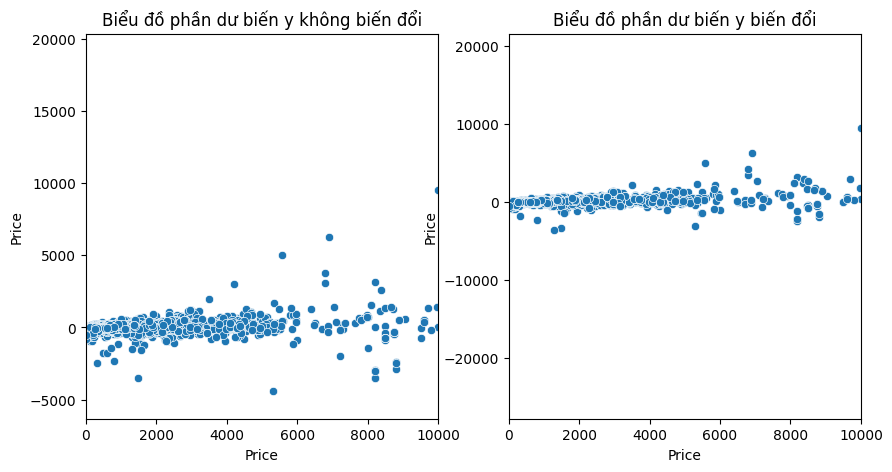

In [44]:
# Biểu đồ phần dư + mô hình XGBoost
xgboost = GridSearch_model(X_cate, X_cont, X_log, models[6][1], param_grid["xgboost"], pca=0)
xgboost.fit(X_train, y_train)
xgboost_predict = xgboost.predict(X_test)

xgboost_ytrans = GridSearch_model_ytrans(X_cate, X_cont, X_log, models[6][1], param_grid["xgboost"], pca=0)
xgboost_ytrans.fit(X_train, y_train)
xgboost_ytrans_predict = xgboost_ytrans.predict(X_test)

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
sns.scatterplot(x=y_test, y=y_test-xgboost_predict, ax=axs[0]).set(title="Biểu đồ phần dư biến y không biến đổi")
axs[0].set_xlim(0, 10000)
sns.scatterplot(x=y_test, y=y_test-xgboost_ytrans_predict, ax=axs[1]).set(title="Biểu đồ phần dư biến y biến đổi")
axs[1].set_xlim(0, 10000)

plt.show()
# Nhìn chung kết quả cho thấy mô hình với biến y biến đổi tốt hơn

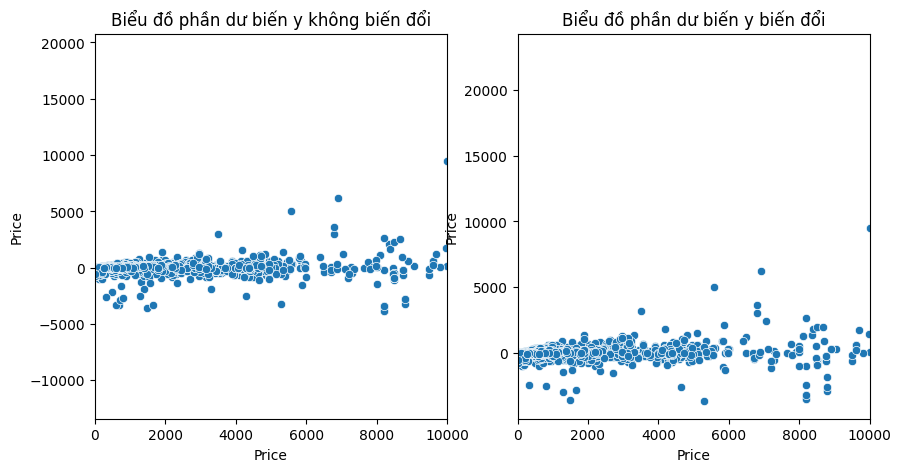

In [45]:
# Biểu đồ phần dư + mô hình Bagging
xgboost = GridSearch_model(X_cate, X_cont, X_log, models[4][1], param_grid["bagging"], pca=0)
xgboost.fit(X_train, y_train)
xgboost_predict = xgboost.predict(X_test)

xgboost_ytrans = GridSearch_model_ytrans(X_cate, X_cont, X_log, models[4][1], param_grid["bagging"], pca=0)
xgboost_ytrans.fit(X_train, y_train)
xgboost_ytrans_predict = xgboost_ytrans.predict(X_test)

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
sns.scatterplot(x=y_test, y=y_test-xgboost_predict, ax=axs[0]).set(title="Biểu đồ phần dư biến y không biến đổi")
axs[0].set_xlim(0, 10000)
sns.scatterplot(x=y_test, y=y_test-xgboost_ytrans_predict, ax=axs[1]).set(title="Biểu đồ phần dư biến y biến đổi")
axs[1].set_xlim(0, 10000)

plt.show()
# Nhìn chung kết quả cho thấy mô hình với biến y biến đổi và không biến đổi không có khác biệt nhiều

## 5.3.Kiểm thử với mô hình chỉ sử dụng train loại bỏ outlier

In [46]:
# Loại bỏ outlier ngoài khoảng 1% và 99%
X_train_1 = X_train[y_train.between(per_1[0],per_1[1])]  
y_train_1 = y_train[y_train.between(per_1[0],per_1[1])]
X_test_1 = X_test[y_test.between(per_1[0],per_1[1])]  
y_test_1 = y_test[y_test.between(per_1[0],per_1[1])]

In [ ]:
# Biến y không biến đổi
Evaluation_model_wo_outlier = Evaluation_model(X_cate, X_cont, X_log, models, param_grid, 0, X_train_1, y_train_1, X_test_1, y_test_1, per_1, per_5)

# Biến y biến đổi
Evaluation_model_wo_outlier_ytrans = Evaluation_model_ytrans(X_cate, X_cont, X_log, models, param_grid, 0, X_train_1, y_train_1, X_test_1, y_test_1, per_1, per_5)

In [48]:
# So sánh 2 mô hình
print(Evaluation_model_wo_outlier)
Evaluation_model_wo_outlier_ytrans

             Model  RMSE_train  R2_train  MAPE_train   RMSE_test   R2_test  \
4          bagging  105.998587  0.987980    0.058813  195.593557  0.959445   
6          xgboost  148.284501  0.976476    0.128573  199.802350  0.957681   
7         lightGBM  258.008738  0.928783    0.144264  309.670034  0.898344   
8  VotingRegressor  329.761239  0.883665    0.271158  351.928604  0.868706   
0           linear  387.461756  0.839391    0.411349  397.306143  0.832666   
2            ridge  387.595155  0.839280    0.410730  397.496310  0.832505   
1            lasso  391.629232  0.835917    0.413185  401.599575  0.829029   
5         adaboost  861.879723  0.205295    1.192531  864.680048  0.207415   
3              sgd  970.962392 -0.008597    0.430293  975.503260 -0.008770   

   MAPE_test  RMSE_test_1  R2_test_1  MAPE_test_1  RMSE_test_5  R2_test_5  \
4   0.099043   195.593557   0.959445     0.099043   143.914000   0.934215   
6   0.136940   199.802350   0.957681     0.136940   144.700767   

,Model,RMSE_train,R2_train,MAPE_train,RMSE_test,R2_test,MAPE_test,RMSE_test_1,R2_test_1,MAPE_test_1,RMSE_test_5,R2_test_5,MAPE_test_5
4,bagging,125.328049,0.983196,0.063498,207.042494,0.954558,0.099485,207.042494,0.954558,0.099485,150.316909,0.928231,0.081336
6,xgboost,183.782169,0.963866,0.103855,224.150773,0.946738,0.114879,224.150773,0.946738,0.114879,146.191374,0.932117,0.095017
0,linear,262.023062,0.926550,0.135812,276.739066,0.918815,0.136340,276.739066,0.918815,0.136340,170.674867,0.907475,0.111189
2,ridge,263.025969,0.925987,0.135828,277.707498,0.918246,0.136317,277.707498,0.918246,0.136317,170.648760,0.907503,0.111160
7,lightGBM,284.202302,0.913589,0.115021,334.282876,0.881542,0.120236,334.282876,0.881542,0.120236,170.684103,0.907465,0.098703
8,VotingRegressor,525.745853,0.704291,0.195291,541.437866,0.689235,0.200208,541.437866,0.689235,0.200208,252.049277,0.798214,0.163762
5,adaboost,850.507908,0.226127,0.516648,855.599188,0.223975,0.513063,855.599188,0.223975,0.513063,473.349619,0.288321,0.463792
1,lasso,960.393262,0.013241,0.529894,963.301724,0.016307,0.532426,963.301724,0.016307,0.532426,538.696607,0.078260,0.443727
3,sgd,1160.993158,-0.442023,0.577823,1202.990922,-0.534121,0.572406,1202.990922,-0.534121,0.572406,995.473856,-2.147601,0.520315


> Nhận xét:\
Nhìn chung, kết quả cho thấy mô hình Bagging và XGBoost vẫn tốt nhất.

In [49]:
# So sánh mô hình xgboost
print(Evaluation_model_wo_outlier[Evaluation_model_wo_outlier["Model"].isin(["bagging","xgboost"])])
print(Evaluation_model_wo_outlier_ytrans[Evaluation_model_wo_outlier_ytrans["Model"].isin(["bagging","xgboost"])])

     Model  RMSE_train  R2_train  MAPE_train   RMSE_test   R2_test  MAPE_test  \
4  bagging  105.998587  0.987980    0.058813  195.593557  0.959445   0.099043   
6  xgboost  148.284501  0.976476    0.128573  199.802350  0.957681   0.136940   

   RMSE_test_1  R2_test_1  MAPE_test_1  RMSE_test_5  R2_test_5  MAPE_test_5  
4   195.593557   0.959445     0.099043   143.914000   0.934215     0.079631  
6   199.802350   0.957681     0.136940   144.700767   0.933494     0.111829  
     Model  RMSE_train  R2_train  MAPE_train   RMSE_test   R2_test  MAPE_test  \
4  bagging  125.328049  0.983196    0.063498  207.042494  0.954558   0.099485   
6  xgboost  183.782169  0.963866    0.103855  224.150773  0.946738   0.114879   

   RMSE_test_1  R2_test_1  MAPE_test_1  RMSE_test_5  R2_test_5  MAPE_test_5  
4   207.042494   0.954558     0.099485   150.316909   0.928231     0.081336  
6   224.150773   0.946738     0.114879   146.191374   0.932117     0.095017  


> Nhận xét:
- Các kết quả cũng tương tự dùng mô hình sử dụng tất cả dữ liệu;
- Kết quả test trong tập test loại bỏ outlier của mục 5.2 và 5.3 tương đương.
>> Thống nhất sử dụng mô hình bagging và xgboost với toàn bộ dữ liệu để đa dạng danh mục xe và sẽ đưa ra cảnh báo với các xe có giá trị ở outlier (mức độ chính xác của mô hình thấp).

# 6.Tunning với mô hình Bagging

In [56]:
# Xây dựng hàm testing
def model_testing(X_cate, X_cont, X_log, model, param_grid, pca, X_train, y_train, X_test, y_test, per_1, per_5):
    full_pipeline = GridSearch_model(X_cate, X_cont, X_log, model, param_grid, pca=pca)
    full_pipeline.fit(X_train, y_train)

    output = Evaluation(X_train, y_train, X_test, y_test,full_pipeline, per_1, per_5).calculate_metrics()
    print("Hyper-parameter tốt nhất là:",full_pipeline.named_steps.gridsearch.best_params_)
    print("Kết quả test là:",output)
    
def model_testing_ytrans(X_cate, X_cont, X_log, model, param_grid, pca, X_train, y_train, X_test, y_test, per_1, per_5):
    full_pipeline = GridSearch_model_ytrans(X_cate, X_cont, X_log, model, param_grid, pca=pca)
    full_pipeline.fit(X_train, y_train)

    output = Evaluation(X_train, y_train, X_test, y_test,full_pipeline, per_1, per_5).calculate_metrics()
    print("Hyper-parameter tốt nhất là:",full_pipeline.regressor_.named_steps.gridsearch.best_params_)
    print("Kết quả test là:",output)

## 6.1.Kiểm thử mô hình Bagging với các biến khác nhau

In [52]:
# Sử dụng tất cả biến
model_testing_ytrans(X_cate, X_cont, X_log, BaggingRegressor(), param_grid["bagging"], 0, X_train, y_train, X_test, y_test, per_1, per_5)

# Không sử dụng biến X_log
model_testing_ytrans(X_cate, X_cont, [], BaggingRegressor(), param_grid["bagging"], 0, X_train, y_train, X_test, y_test, per_1, per_5)

# Không sử dụng biến X_cont
model_testing_ytrans(X_cate, [], X_log, BaggingRegressor(), param_grid["bagging"], 0, X_train, y_train, X_test, y_test, per_1, per_5)

Hyper-parameter tốt nhất là: {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 30}
Kết quả test là: [406.90683145498804, 0.9508037671543906, 0.1148632463897346, 422.8395998933824, 0.9334998078036912, 0.21077862481772924, 211.90061825062648, 0.9524008350339492, 0.10434780225001362, 154.82036862580384, 0.9238664471091461, 0.08666767356886533]
Hyper-parameter tốt nhất là: {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 30}
Kết quả test là: [386.60705917947604, 0.9555899312618858, 0.11983686803951998, 401.15334125515403, 0.9401461044037398, 0.2114258865763745, 208.61933705401333, 0.9538635676508708, 0.10382792111308313, 150.16718853910118, 0.9283741147299224, 0.08570093761371184]
Hyper-parameter tốt nhất là: {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 30}
Kết quả test là: [400.9719070344178, 0.9522284009984765, 0.11672373448391841, 414.76283716563063, 0.9360160176129548, 0.2071299221995116, 213.19522135616432, 0.9518174458334691, 0.10506138673211815, 152.078

> Kết quả mô hình chỉ sử dụng biến X_cont tốt nhất

## 6.2.Tunning hyper-parameter

In [57]:
bagging_param = {'n_estimators': [30, 40, 50],
                 'max_samples': [0.3, 0.4, 0.5],
                 'max_features': [1.0]}

# Biến Y không biến đổi
model_testing(X_cate, X_cont, [], BaggingRegressor(), bagging_param, 0, X_train, y_train, X_test, y_test, per_1, per_5)

# Biến Y biến đổi
model_testing_ytrans(X_cate, X_cont, [], BaggingRegressor(), bagging_param, 0, X_train, y_train, X_test, y_test, per_1, per_5)

Hyper-parameter tốt nhất là: {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 40}
Kết quả test là: [337.9684514439971, 0.966061377623716, 0.1683092328530465, 417.6782047261723, 0.9351133696731969, 0.21377635576767598, 222.97610744199352, 0.9472950330349877, 0.10441219823441085, 166.6315946514323, 0.9118069008993137, 0.08464802965280864]
Hyper-parameter tốt nhất là: {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}
Kết quả test là: [389.7963523341475, 0.954854192288925, 0.11469488581810688, 416.36875100715383, 0.9355195812057064, 0.21350484220990484, 209.33274748823786, 0.9535474848690556, 0.10322415218340572, 149.25509789660097, 0.9292415598845365, 0.08527508035840829]


# 7.Tunning với mô hình XGBoost

## 7.1.Kiểm thử mô hình xgboost với các biến khác nhau

In [44]:
# Sử dụng tất cả biến
model_testing_ytrans(X_cate, X_cont, X_log, XGBRegressor(), param_grid["xgboost"], 0, X_train, y_train, X_test, y_test, per_1, per_5)

# Không sử dụng biến X_log
model_testing_ytrans(X_cate, X_cont, [], XGBRegressor(), param_grid["xgboost"], 0, X_train, y_train, X_test, y_test, per_1, per_5)

# Không sử dụng biến X_cont
model_testing_ytrans(X_cate, [], X_log, XGBRegressor(), param_grid["xgboost"], 0, X_train, y_train, X_test, y_test, per_1, per_5)

Hyper-parameter tốt nhất là: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200}
Kết quả test là: [470.0197485948529, 0.934359164883497, 0.174869256861293, 530.1750659827862, 0.8954533328978302, 0.2309355969167367, 225.87579480953957, 0.9459153188386121, 0.11909818786110797, 155.89227847991725, 0.9228085654265406, 0.10012058740053208]
Hyper-parameter tốt nhất là: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200}
Kết quả test là: [470.0197485948529, 0.934359164883497, 0.174869256861293, 530.1750659827862, 0.8954533328978302, 0.2309355969167367, 225.87579480953957, 0.9459153188386121, 0.11909818786110797, 155.89227847991725, 0.9228085654265406, 0.10012058740053208]
Hyper-parameter tốt nhất là: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200}
Kết quả test là: [470.0197485948529, 0.934359164883497, 0.174869256861293, 530.1750659827862, 0.8954533328978302, 0.2309355969167367, 225.87579480953957, 0.9459153188386121, 0.11909818786110797, 155.89227847991725, 0.9228

> Các kết quả không khác nhau do đó sẽ chỉ sử dụng biến X_cont để đơn giản triển khai

## 7.2.Tunning hyper-parameter

In [45]:
xgboost_param = {'learning_rate': [0.5, 0.3, 0.1],
                 'n_estimators': [100, 200, 500, 1000],
                 'max_depth': [4, 5, 6, 7]}

model_testing_ytrans(X_cate, X_cont, [], XGBRegressor(), xgboost_param, 0, X_train, y_train, X_test, y_test, per_1, per_5)

Hyper-parameter tốt nhất là: {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 500}
Kết quả test là: [414.1915214804429, 0.9490265187066285, 0.15281685225085836, 426.06602381504223, 0.9324810934305384, 0.21805981632238944, 213.11250813794075, 0.9518548252925225, 0.10837452759742652, 143.66889734493373, 0.9344390225124034, 0.0898780940068059]


# 8.Lựa chọn mô hình và kiểm thử

In [70]:
# Mô hình Bagging với biến y biến đổi
# Không dùng FeatureAddition để triển khai heroku
final_model = BaggingRegressor(max_features = 1.0, max_samples = 0.5, n_estimators = 50)

PreProcessing = compose.ColumnTransformer(
                transformers=[
                        ('Categorical', preprocessing.OneHotEncoder(drop='if_binary'), X_cate),
                        ('Continuous', preprocessing.StandardScaler(), X_cont)
                        ],
                remainder='drop'
                )

regressor = pipeline.Pipeline([
        ('preprocessing', PreProcessing),
        ('estimator', final_model)
        ])

full_pipeline = compose.TransformedTargetRegressor(
                        regressor=regressor,
                        transformer=target_preprocessor
                        )

X_train["age"] = datetime.now().year - X_train['mfdate']
X_test["age"] = datetime.now().year - X_test['mfdate']

full_pipeline.fit(X_train, y_train)

full_pipeline

TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessing',
                                                      ColumnTransformer(transformers=[('Categorical',
                                                                                       OneHotEncoder(drop='if_binary'),
                                                                                       ['carbrand',
                                                                                        'carmodel',
                                                                                        'condition_ad',
                                                                                        'gearbox',
                                                                                        'fuel',
                                                                                        'carorigin']),
                                                                                      ('Continuous',
                                                                                       StandardScaler(),
                                                                                       ['age',
                                                                                        'mileage_v2'])])),
                                                     ('estimator',
                                                      BaggingRegressor(max_samples=0.5,
                                                                       n_estimators=50))]),
                           transformer=FunctionTransformer(func=<ufunc 'log'>,
                                                           inverse_func=<ufunc 'exp'>))

In [71]:
testing = Evaluation(X_train, y_train, X_test, y_test,full_pipeline, per_1, per_5).calculate_metrics()
pd.DataFrame([testing],columns=["RMSE_train", "R2_train", "MAPE_train", "RMSE_test", "R2_test", "MAPE_test",
                                "RMSE_test_1", "R2_test_1", "MAPE_test_1", "RMSE_test_5", "R2_test_5", "MAPE_test_5"])

,RMSE_train,R2_train,MAPE_train,RMSE_test,R2_test,MAPE_test,RMSE_test_1,R2_test_1,MAPE_test_1,RMSE_test_5,R2_test_5,MAPE_test_5
0,399.282293,0.95263,0.114021,411.083778,0.937146,0.212101,209.266063,0.953577,0.103372,148.333205,0.930113,0.085645


In [72]:
test = pd.DataFrame([{"carbrand":"Hyundai",
                     "carmodel":"Kona",
                     "fuel":"Xăng",
                     "condition_ad":"Đã sử dụng",
                     "gearbox":"Tự động",
                     "age":4,
                     "mileage_v2":30000,
                     "carorigin":"Lắp ráp trong nước"}])
full_pipeline.predict(test)

array([543.39546375])

# 9.Trích xuất mô hình và dữ liệu cần thiết để deploy

In [73]:
# Final model
with open("4. Web deploy/final_model.pkl","wb") as f:
    pickle.dump(full_pipeline,f)

In [50]:
# Full data
with open("4. Web deploy/full_data.pkl","wb") as f:
    pickle.dump(main,f)

In [51]:
# Lấy thông tin carbrand và cartype
carbrand_list = list(np.sort(main["carbrand"].unique()))

car_list = {}
for carbrand in carbrand_list:
    carmodel = list(np.sort(main.loc[main["carbrand"]==carbrand,"carmodel"].unique()))
    car_list[carbrand] = carmodel

with open("4. Web deploy/car_list.pkl","wb") as f:
    pickle.dump(car_list,f)